In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_excel(r"/content/DATA-PRUEBA_CALIFICACIONES  2017-2019-FISI.xlsx",sheet_name=None)

In [3]:
data_2017=pd.DataFrame(data['2017'])
data_2018=pd.DataFrame(data['2018'])
data_2019=pd.DataFrame(data['2019'])

data_calif=pd.concat([data_2017,data_2018,data_2019],axis=0)

In [4]:
data_calif.head()

,cod_semestre,cod_facultad,cod_escuela,cod_plan,cod_asignatura,cod_alumno,val_calific_final
0,20171,20,1,2002,201101,06200023,11
1,20171,20,1,2002,201101,05200188,12
2,20171,20,1,2002,201101,08200095,15
3,20171,20,1,2002,201101,07200077,13
4,20171,20,1,2002,201101,08200198,12


In [5]:
#exploracion de datos
data_calif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47035 entries, 0 to 15623
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cod_semestre       47035 non-null  int64 
 1   cod_facultad       47035 non-null  int64 
 2   cod_escuela        47035 non-null  int64 
 3   cod_plan           47035 non-null  object
 4   cod_asignatura     47035 non-null  object
 5   cod_alumno         47035 non-null  object
 6   val_calific_final  47035 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


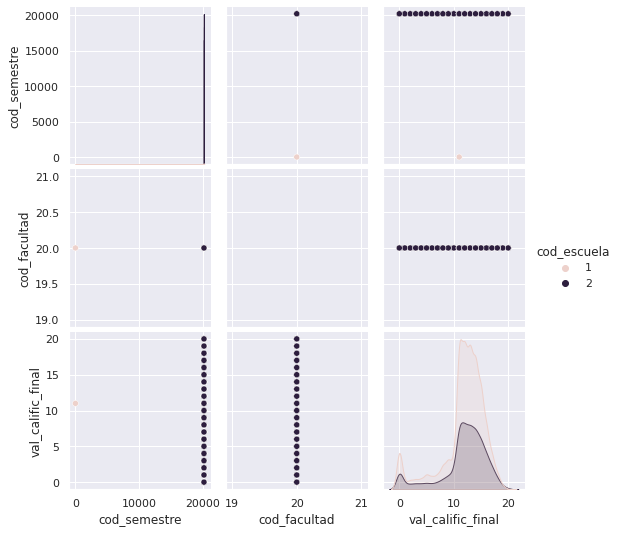

In [6]:
sns.pairplot(data_calif,hue='cod_escuela')

20    47035
Name: cod_facultad, dtype: int64


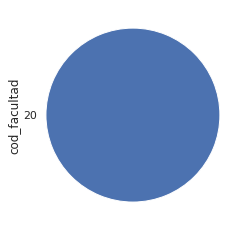

In [7]:
report=data_calif['cod_facultad'].value_counts()
print(report)
data_calif['cod_facultad'].value_counts().plot(kind="pie")
plt.show()

20171    8835
20172    8175
20191    8089
20192    7535
20181    7479
20182    6921
3           1
Name: cod_semestre, dtype: int64


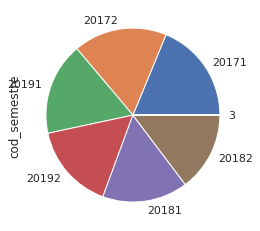

In [8]:
report=data_calif['cod_semestre'].value_counts()
print(report)
data_calif['cod_semestre'].value_counts().plot(kind="pie")
plt.show()

2014      15137
2009       8351
2014       7110
2015       6763
2018       3454
2015       3008
2009       2046
2002       1137
PCONV        29
Name: cod_plan, dtype: int64


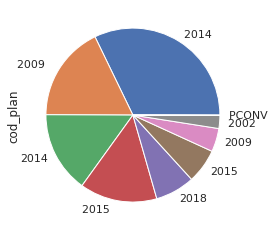

In [9]:
report=data_calif['cod_plan'].value_counts()
print(report)
data_calif['cod_plan'].value_counts().plot(kind="pie")
plt.show()

1    31519
2    15516
Name: cod_escuela, dtype: int64


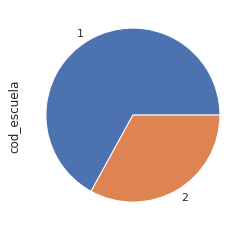

In [10]:
report=data_calif['cod_escuela'].value_counts()
print(report)
data_calif['cod_escuela'].value_counts().plot(kind="pie")
plt.show()

2010302     489
2010303     445
2010304     432
2010306     426
2010305     392
           ... 
2020105       1
2020301       1
203008        1
202009        1
2020204       1
Name: cod_asignatura, Length: 487, dtype: int64


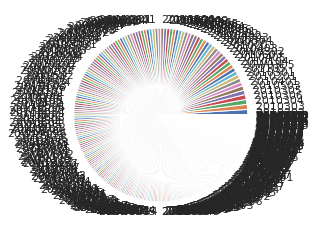

In [11]:
report=data_calif['cod_asignatura'].value_counts()
print(report)
data_calif['cod_asignatura'].value_counts().plot(kind="pie")
plt.show()

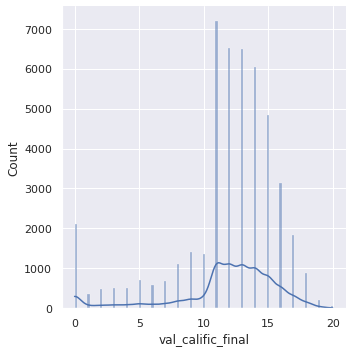

In [12]:
sns.displot(data_calif,x='val_calific_final',kde=True)

In [13]:
#resumen
#Variables objetivo: Calificaciones
#caracteristicas: Los demas datos excepto codigo
#las columnas cod_semestre,cod_plan,cod_escuela,cod_asignatura son categoricas por lo que necesitan una codificacion de variables
#las columnas de codigo

In [14]:
#Preparacion de datos
data_calif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47035 entries, 0 to 15623
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cod_semestre       47035 non-null  int64 
 1   cod_facultad       47035 non-null  int64 
 2   cod_escuela        47035 non-null  int64 
 3   cod_plan           47035 non-null  object
 4   cod_asignatura     47035 non-null  object
 5   cod_alumno         47035 non-null  object
 6   val_calific_final  47035 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ MB


In [15]:
#primero eliminamos los valores innecesarios
data_calif.drop(columns=["cod_alumno","cod_facultad"],inplace=True)
data_calif.head()

,cod_semestre,cod_escuela,cod_plan,cod_asignatura,val_calific_final
0,20171,1,2002,201101,11
1,20171,1,2002,201101,12
2,20171,1,2002,201101,15
3,20171,1,2002,201101,13
4,20171,1,2002,201101,12


In [16]:
#primero codificamos los valores categoricos
data_calif=pd.get_dummies(data_calif,columns=["cod_escuela","cod_semestre","cod_plan","cod_asignatura"])

In [17]:
#luego ya tenemos los datos procesados para la clasificacion y regresion o agrupamiento y redes neuronales
data_calif.head()

,val_calific_final,cod_escuela_1,cod_escuela_2,cod_semestre_3,cod_semestre_20171,cod_semestre_20172,cod_semestre_20181,cod_semestre_20182,cod_semestre_20191,cod_semestre_20192,cod_plan_2009,cod_plan_2014,cod_plan_2015,cod_plan_2018,cod_plan_2002,cod_plan_2009,cod_plan_2014,cod_plan_2015,cod_plan_PCONV,cod_asignatura_201003,cod_asignatura_201101,cod_asignatura_201103,cod_asignatura_201104,cod_asignatura_201105,cod_asignatura_201106,cod_asignatura_201204,cod_asignatura_201205,cod_asignatura_201206,cod_asignatura_201207,cod_asignatura_201208,cod_asignatura_201210,cod_asignatura_201211,cod_asignatura_202001,cod_asignatura_202003,cod_asignatura_202004,cod_asignatura_202007,cod_asignatura_202008,cod_asignatura_202009,cod_asignatura_203001,cod_asignatura_203004,...,cod_asignatura_20W0503,cod_asignatura_20W0504,cod_asignatura_20W0505,cod_asignatura_20W0506,cod_asignatura_20W0601,cod_asignatura_20W0602,cod_asignatura_20W0603,cod_asignatura_20W0604,cod_asignatura_20W0605,cod_asignatura_20W0701,cod_asignatura_20W0702,cod_asignatura_20W0703,cod_asignatura_20W0704,cod_asignatura_20W0705,cod_asignatura_20W07056,cod_asignatura_20W0801,cod_asignatura_20W0802,cod_asignatura_20W0803,cod_asignatura_20W0804,cod_asignatura_20W0805,cod_asignatura_20W0806,cod_asignatura_20W0901,cod_asignatura_20W0902,cod_asignatura_20W0903,cod_asignatura_20W0904,cod_asignatura_20W0905,cod_asignatura_20W0E01,cod_asignatura_20W0E02,cod_asignatura_20W0E03,cod_asignatura_20W0E04,cod_asignatura_20W0E05,cod_asignatura_20W0E08,cod_asignatura_20W0E10,cod_asignatura_20W0E11,cod_asignatura_20W0E13,cod_asignatura_20W1001,cod_asignatura_20W1002,cod_asignatura_20W1003,cod_asignatura_20W1004,cod_asignatura_20W1005
0,11,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#separacion de la variable objetivo de las caracteristicas
X=data_calif.drop('val_calific_final',axis=1).values
y=data_calif['val_calific_final'].values

## IMPLEMENTACION DEL ALGORITMO DE CLASIFICACION PARA PREDICCION DE RENDIMIENTO ACADEMICO

In [19]:
#segmentar a los alumnos por sus calificaciones
grado=['D','A','B','MB','E']
y=pd.cut(y,bins=[0,11,13,16,18,21],labels=grado,right=False)
#codificacion de variable objetivo
from sklearn.preprocessing import LabelEncoder
encoder_grado=LabelEncoder()
y=encoder_grado.fit_transform(y.astype('str')).astype('int64')
y_kmeans=y

In [20]:
#separamos los datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)
#escojemos las maquinas de soporte vectorial


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
#instanciamos el modelo
model_clasif=RandomForestClassifier(n_estimators=1000,max_depth=5,class_weight='balanced')
#entrenamos el modelo
kf=StratifiedKFold(n_splits=10,shuffle=True)
result=cross_val_score(model_clasif,x_train,y_train,cv=kf,n_jobs=-1)
#model_clasif.fit(x_train,y_train)


In [22]:
result.mean()

0.31612231881833364

In [23]:
model_clasif.fit(x_train,y_train);

In [24]:
model_clasif.score(x_test,y_test)

0.30125434058535894

In [25]:
#ahora evaluaremos el rendimiento del modelo
y_pred=model_clasif.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report

report=classification_report(y_test,y_pred)

In [26]:
print(report)

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      4118
           1       0.46      0.27      0.34      5214
           2       0.40      0.26      0.32      2943
           3       0.06      0.59      0.10       345
           4       0.29      0.25      0.27      1491

    accuracy                           0.30     14111
   macro avg       0.31      0.35      0.28     14111
weighted avg       0.39      0.30      0.33     14111



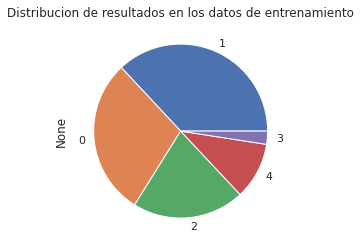

In [27]:

pd.Series(y_test).value_counts().plot(kind='pie')
plt.title("Distribucion de resultados en los datos de entrenamiento")

plt.show()

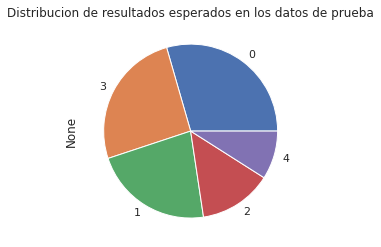

In [28]:
pd.Series(y_pred).value_counts().plot(kind='pie')
plt.title("Distribucion de resultados esperados en los datos de prueba")

plt.show()

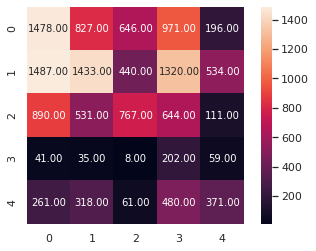

In [29]:
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='0.2f',square=True)


In [30]:
#guardado del modelo de machine learning
import joblib
joblib.dump(model_clasif,"modelo_clasificacion_rendimiento.pkl")

['modelo_clasificacion_rendimiento.pkl']

MODELO DE REGRESION PARA LA PREDICCION DEL RENDIMIENTO ACADEMICO

In [31]:
#separacion de la variable objetivo de las caracteristicas
X=data_calif.drop('val_calific_final',axis=1).values
y=data_calif['val_calific_final'].values
#Separamos los datos en entrenamiento y test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [32]:
#seleccion del modelo de machine learning
from sklearn.svm import SVR

model_regressor=SVR(C=200,gamma=0.001)


In [33]:
model_regressor.fit(x_train,y_train)

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
model_regressor.score(x_test,y_test)

0.12141372678155382

In [35]:
y_pred=model_regressor.predict(x_test)
#evaluacion del modelo
from sklearn.metrics import mean_squared_error,r2_score
result=mean_squared_error(y_test,y_pred)
print("Error cuadratico medio ={0}",result)
result=r2_score(y_test,y_pred)
print("R2 Score ={0}",result)

Error cuadratico medio ={0} 15.081546765608266
R2 Score ={0} 0.12141372678155382


In [36]:
def plot_compare(x1,x2):
  points=range(1,x1.shape[0]+1)
  plt.plot(x1,'go',label='Y verdadero')
  plt.plot(x2,'ro',label='Y predecido')
  plt.legend(loc='best')
  plt.show()

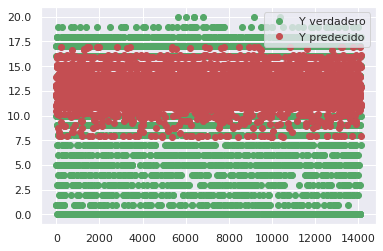

In [37]:
#puntos esparcidos
plot_compare(y_test,y_pred)

In [38]:
pd.DataFrame({
    "Resultado Real": y_test,
    "Resultado Predecido":y_pred
})

,Resultado Real,Resultado Predecido
0,1,13.918186
1,12,11.935316
2,16,13.100240
3,17,13.045886
4,5,11.099718
...,...,...
14106,10,11.131994
14107,11,12.906094
14108,15,7.900261
14109,7,12.899824


In [39]:
joblib.dump(model_regressor,"model_regressor_rendimiento.pkl")

['model_regressor_rendimiento.pkl']

In [40]:
y_test.max()

20

## MODELO DE APRENDIZAJE NO SUPERVISADO PARA ENCONTRAR PATRONES EN EL RENDIMIENTO ACADEMICO

In [41]:
#como se trata de aprendizaje no supervisado ya no contaremos con las variables de salida
#separacion de la variable objetivo de las caracteristicas
X=data_calif.drop('val_calific_final',axis=1).values

from sklearn.cluster import MiniBatchKMeans

score=[]
#seleccionamos los mejores grupos
for N in range(1,21):
  cluster=MiniBatchKMeans(n_clusters=N,
                          random_state=42,
                          batch_size=16
                          )
  score.append(cluster.fit(X).score(X))


Text(0.5, 1.0, 'Curva de puntaje')

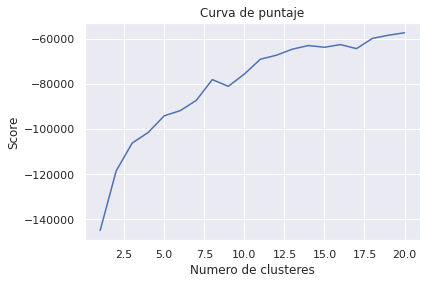

In [42]:
plt.plot(range(1,len(score)+1),score)
plt.xlabel("Numero de clusteres")
plt.ylabel("Score")
plt.title("Curva de puntaje")

In [43]:
#en este grafico que se obtiene un mayor rendimiento con 17 clusteres o grupos
#es decir se encuentran patrones optimos para esa cantidad de grupos
model_cluster=MiniBatchKMeans(n_clusters=17,
                              random_state=42,
                              batch_size=16)
model_cluster.fit(X);

In [44]:
#ahora observamos los centros de datos
model_cluster.labels_

array([16, 16, 16, ...,  6,  6,  6], dtype=int32)

    No. Elementos
1            7110
4            4821
13           4001
3            3853
14           3784
5            3778
0            3750
2            3727
7            3561
11           1860
15           1793
6            1703
10           1268
16           1137
8             690
9             100
12             99


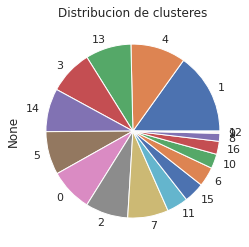

In [45]:
labels_cluster=model_cluster.labels_
dat=pd.DataFrame(pd.Series(labels_cluster).value_counts(),columns=['No. Elementos'])
print(dat)
pd.Series(labels_cluster).value_counts().plot(kind='pie')
plt.title("Distribucion de clusteres")
plt.show()

In [46]:
#implementacion del modelo
joblib.dump(model_cluster,"modelo_cluster_rendimiento.pkl")

['modelo_cluster_rendimiento.pkl']

In [47]:
#luego paso la variable y_kmeans para el uso de redes neuronales
y=y_kmeans #paso una variable codificada en categorica

## MODELO DE APRENDIZAJE POR REFUERZO BASADO EN REDES NEURONALES PARA PREDECIR EL RENDIMIENTO ACADEMICO

In [48]:
#separacion de la variable objetivo de las caracteristicas
X=data_calif.drop('val_calific_final',axis=1).values
y=data_calif['val_calific_final'].values

In [49]:
#segmentar a los alumnos por sus calificaciones
grado=['D','A','B','MB','E']
y=pd.cut(y,bins=[0,11,13,16,18,21],labels=grado,right=False)
#codificacion de variable objetivo
from sklearn.preprocessing import LabelEncoder
encoder_grado=LabelEncoder()
y=encoder_grado.fit_transform(y.astype('str')).astype('int64')

In [50]:
#importamos las librerias necesarias
from tensorflow import keras
#primero construimos una red neuronal basado en la API functional
#Entradas: Arreglo de tamaño n_caracterisiticas = x_train.shape[1]
n_caracteristicas=X.shape[1]
def build_model():
  input=keras.Input(shape=(n_caracteristicas,))       #Tamaño de datos de entrada
  x=keras.layers.Dense(512,activation="relu")(input)  #1era capa de 512 neuronas
  x=keras.layers.Dense(128,activation="relu")(x)      #2da capa de 128 neuronas
  output=keras.layers.Dense(5,activation="softmax")(x)   #capa de salida de tamaño 6 con activacion softmax para clasificacion 
  model=keras.Model(inputs=input,outputs=output)      #
  #Se realiza la compilacion del modelo
  model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])
  return model


In [51]:
#ahora necesitamos codificar la variable Y como OneHotEncoding para que acepte la probabilidad por clase
#ejem: [0,0,0,0,01]
from keras.utils import to_categorical
y=to_categorical(y,num_classes=5)
#Separamos los datos en entrenamiento y test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42,shuffle=True,stratify=y_train)



In [52]:
#ahora realizamos las graficas de puntajes de perdida y precision
def plot_loss(history):
  epochs=range(1,len(history['loss'])+1)
  plt.plot(epochs,history['loss'],'bo-',label='Loss train')
  plt.plot(epochs,history['val_loss'],'ro-',label='Loss validation')
  plt.xlabel("epochs")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

In [53]:
def plot_accuracy(history):
  epochs=range(1,len(history['accuracy'])+1)
  plt.plot(epochs,history['accuracy'],'bo-',label='Accuracy train')
  plt.plot(epochs,history['val_accuracy'],'ro-',label='Accuracy validation')
  plt.xlabel("epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

In [54]:
#procedemos a entrenar el modelo
model_deep=build_model()
history=model_deep.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
824/824 [==============================] - 7s 7ms/step - loss: 1.3201 - accuracy: 0.4149 - val_loss: 1.2117 - val_accuracy: 0.4582
Epoch 2/100
824/824 [==============================] - 5s 6ms/step - loss: 1.1970 - accuracy: 0.4668 - val_loss: 1.1901 - val_accuracy: 0.4691
Epoch 3/100
824/824 [==============================] - 5s 6ms/step - loss: 1.1582 - accuracy: 0.4912 - val_loss: 1.1806 - val_accuracy: 0.4721
Epoch 4/100
824/824 [==============================] - 5s 6ms/step - loss: 1.1495 - accuracy: 0.4940 - val_loss: 1.1851 - val_accuracy: 0.4765
Epoch 5/100
824/824 [==============================] - 5s 7ms/step - loss: 1.1287 - accuracy: 0.5031 - val_loss: 1.1765 - val_accuracy: 0.4785
Epoch 6/100
824/824 [==============================] - 6s 7ms/step - loss: 1.1352 - accuracy: 0.5047 - val_loss: 1.1757 - val_accuracy: 0.4773
Epoch 7/100
824/824 [==============================] - 6s 7ms/step - loss: 1.1213 - accuracy: 0.5091 - val_loss: 1.1718 - val_accuracy: 0.4787

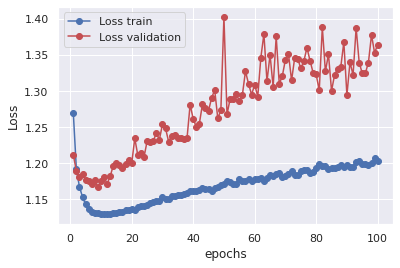

In [55]:
#history=_
plot_loss(history.history)

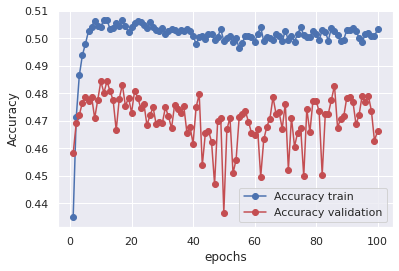

In [56]:
plot_accuracy(history.history)

In [57]:
#como existe un sobreajuste procedemos a reducir la complejidad del modelo
def build_model():
  input=keras.Input(shape=(n_caracteristicas,))       #Tamaño de datos de entrada
  x=keras.layers.Dense(512,activation="relu")(input)  #1era capa de 512 neuronas
  x=keras.layers.Dropout(0.5)(x)                       #capa de descersion
  x=keras.layers.Dense(64,activation="relu")(x)      #2da capa de 64 neuronas
  output=keras.layers.Dense(5,activation="softmax")(x)   #capa de salida de tamaño 6 con activacion softmax para clasificacion 
  model=keras.Model(inputs=input,outputs=output)      #
  #Se realiza la compilacion del modelo
  model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])
  return model

In [58]:
#procedemos a entrenar el modelo para mejorar sus rendimiento
model_deep=build_model()
history=model_deep.fit(x_train,y_train,batch_size=256,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
103/103 [==============================] - 2s 17ms/step - loss: 1.3954 - accuracy: 0.3702 - val_loss: 1.2736 - val_accuracy: 0.4140
Epoch 2/50
103/103 [==============================] - 2s 15ms/step - loss: 1.2561 - accuracy: 0.4474 - val_loss: 1.2031 - val_accuracy: 0.4674
Epoch 3/50
103/103 [==============================] - 2s 16ms/step - loss: 1.2057 - accuracy: 0.4713 - val_loss: 1.1939 - val_accuracy: 0.4626
Epoch 4/50
103/103 [==============================] - 2s 15ms/step - loss: 1.1828 - accuracy: 0.4752 - val_loss: 1.1842 - val_accuracy: 0.4685
Epoch 5/50
103/103 [==============================] - 2s 15ms/step - loss: 1.1659 - accuracy: 0.4893 - val_loss: 1.1695 - val_accuracy: 0.4755
Epoch 6/50
103/103 [==============================] - 2s 16ms/step - loss: 1.1612 - accuracy: 0.4906 - val_loss: 1.1713 - val_accuracy: 0.4767
Epoch 7/50
103/103 [==============================] - 2s 16ms/step - loss: 1.1484 - accuracy: 0.5006 - val_loss: 1.1654 - val_accuracy: 0.4727

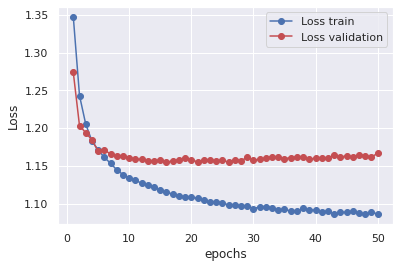

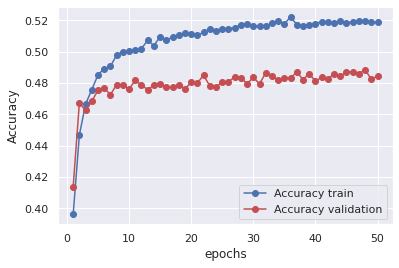

In [59]:
#ver los resultados
plot_loss(history.history)
plot_accuracy(history.history)

In [60]:
#realizamos la evaluacion del modelo
model_deep.evaluate(x_test,y_test)

441/441 [==============================] - 1s 2ms/step - loss: 1.1909 - accuracy: 0.4745


[1.1908522844314575, 0.47445255517959595]

In [61]:
y_pred=model_deep.predict(x_test)

In [62]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.45      0.45      0.45      4118
           1       0.50      0.68      0.58      5214
           2       0.45      0.35      0.39      2943
           3       0.33      0.11      0.17       345
           4       0.45      0.17      0.24      1491

    accuracy                           0.47     14111
   macro avg       0.44      0.35      0.37     14111
weighted avg       0.47      0.47      0.46     14111



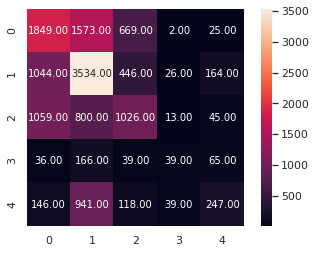

In [64]:
conf= confusion_matrix(y_test,y_pred)
sns.heatmap(conf,fmt='0.2f',annot=True,square=True)


In [65]:
#implementacion del modelo
model_deep.save("model_deep_rendimiento")

INFO:tensorflow:Assets written to: model_deep_rendimiento/assets


In [65]:
model_deep.summary()

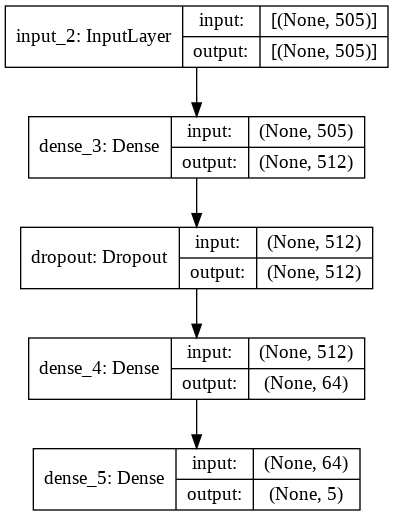

In [66]:
from keras.utils import plot_model

plot_model(model_deep,show_shapes=True)

In [67]:
model_deep.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 505)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               259072    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 292,229
Trainable params: 292,229
Non-trainable params: 0
_________________________________________________________________
